In [1]:
import os
import numpy as np
from gen1_preprocessor import Preprocessor
from gen1_classifier import Classifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
import glob

In [2]:
preprocessor = Preprocessor(use_pca=False)
classifier = Classifier()
current_path = os.path.abspath('')
traning_set_path = os.path.join(current_path,"training")
testing_set_path = os.path.join(current_path,"training")

print (f'Traning Set:{traning_set_path}')
print (f'Testing Set:{testing_set_path}')

Traning Set:/workspace/training
Testing Set:/workspace/training


In [3]:
x_traning,y_traning = preprocessor.load_training_data(traning_set_path,limit=None)
x_traning.shape

load data src:/workspace/training, limit:None


(5802, 12420)

In [4]:
#test_data,y_test = preprocessor.load_testing_data(testing_set_path,limit=1000,hasLabel=True)
test_count = 700
test_data,y_test = x_traning[:test_count],y_traning[:test_count]
x,y =x_traning[test_count:,:],y_traning[test_count:]

classifier.fit(x,y)
y_test_predictions = classifier.predict(test_data)
y_test_predict_probabilities = classifier.predict_proba(test_data)

Accuracy: 0.86
Classification report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.90       453
           1       0.85      0.73      0.79       247

    accuracy                           0.86       700
   macro avg       0.86      0.83      0.84       700
weighted avg       0.86      0.86      0.86       700

(700,)
(700,)


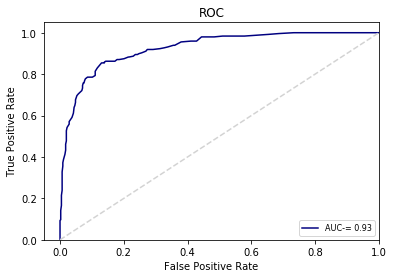

In [5]:
print ('Accuracy:',(y_test_predictions == y_test).sum().astype(float)/(y_test.shape[0]))
print ('Classification report:')
print (classification_report(y_test, y_test_predictions))
print(y_test.shape)
print(y_test_predictions.shape)
#Not sure if this is correct to map score 
y_score = y_test_predict_probabilities[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(false_positive_rate, true_positive_rate)
# Plotting
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate, c='navy', label=('AUC-'+'= %0.2f'%roc_auc))
plt.legend(loc='lower right', prop={'size':8})
plt.plot([0,1],[0,1], color='lightgrey', linestyle='--')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
x,y=x_traning[:],y_traning[:]
max_features_options = (10,100,200,300,'auto',None,'log2')
for n in max_features_options:
    classifier = Classifier(max_features=n)
    score = cross_validate(classifier.model,x,y,cv=5,scoring=('roc_auc'))
    avg = np.average(score['test_score'])
    print(n)
    print(avg)
    print(score)

10
0.9340908786639799
{'fit_time': array([7.520432  , 7.42486119, 7.3576014 , 7.18485045, 7.2317636 ]), 'score_time': array([0.10914683, 0.10918236, 0.10694551, 0.11028218, 0.10774446]), 'test_score': array([0.92753082, 0.92518756, 0.94770447, 0.92949729, 0.94053425])}
100
0.9355119249998616
{'fit_time': array([7.20741844, 7.03430223, 7.19797325, 6.94246626, 7.06805491]), 'score_time': array([0.05859661, 0.05684876, 0.0577209 , 0.05675626, 0.05707097]), 'test_score': array([0.9268599 , 0.92731104, 0.94649508, 0.93391406, 0.94297955])}
200
0.9345348712359047
{'fit_time': array([7.7948494 , 7.83595157, 8.05651951, 7.71461558, 8.03600001]), 'score_time': array([0.05181313, 0.05199218, 0.05282974, 0.05311418, 0.05267262]), 'test_score': array([0.9227121 , 0.92609809, 0.94671045, 0.9356271 , 0.94152662])}
300
0.9333725350126638
{'fit_time': array([8.69045258, 8.57399607, 8.94168448, 8.46426034, 8.79551101]), 'score_time': array([0.05008435, 0.04958081, 0.05148244, 0.04968643, 0.05074453]), 